In [2]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [3]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

In [4]:
def ramsey(psi0, t, delta, delPrime, Omega0):
    #psi0 = initial state vector
    #t = dark time
    #delta = dark time detuning
    #delprime = pulse detuning
    #Omega0 = rabi freq.
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    
    return pi2Pulse@freeEvo@pi2Pulse@psi0

def rabi(psi0, t, delPrime, Omega0):
    piPulse = pulse(np.pi, Omega0, delPrime, 0.0, 0.0)
    return piPulse@psi0

def ramseyInj(psi0, t, delta, delPrime, Omega0, phi):
    pi2Pulse = pulse(np.pi/(2.0*Omega0), Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, phi) 
    
    return pi2Pulse@freeEvo@pi2PhaseInj@pi2Pulse@psi0

**Ex 1)** Start with an system in the ground state and then apply a $\pi$ pulse.

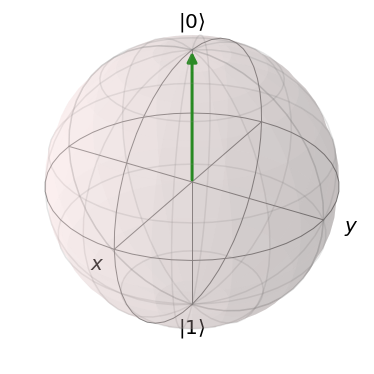

In [12]:
psi0 = psi(1.0, 0.0)
piPulse = pulse(np.pi, 1.0, 0.0, 0.0, 0.0)
psi1 = piPulse@psi0

b = Bloch()
b.add_vectors(blochVec(psi0))
#b.add_vectors(blochVec(psi1))
b.show()

**Ex 2)** Now again we'll start with the system in the ground state but do a Ramsey sequence. 

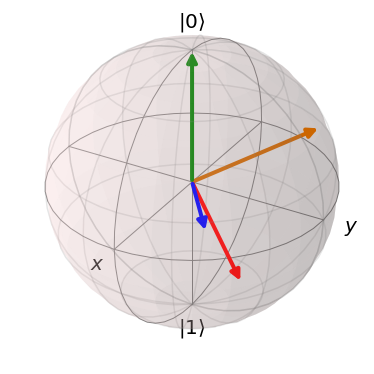

In [51]:
psi0 = psi(1.0, 0.0)
pi2Pulse = pulse(np.pi/2.0, 1.0, 1.0, 0.0, 0.0)
pi2Pulse2 = pulse(np.pi/2.0, 1.0, 1.0, 0.0, 0.0)
phase = pulse(0.0, 0.0, 0.0, 0.0, +1.9181341284294113)
#pulse(t, Omega0, delta, phi0, phi1):
psi1 = pi2Pulse@psi0
psi2 = phase@psi1
psi3 = pi2Pulse@psi2

b = Bloch()
b.vector_color = ['g', '#CC6600', 'b', 'r']
#b.add_vectors(np.array([np.cos(0.1),np.sin(0.1),0]))
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.add_vectors(blochVec(psi3))


#b.add_vectors(blochVec(ramsey(psi0, 1.0, 0.3, 0.0, 1.0)))
b.vector_width = 4
b.show()

**Ex 3)** Maybe now a $\pi$ pulse with some detuning.

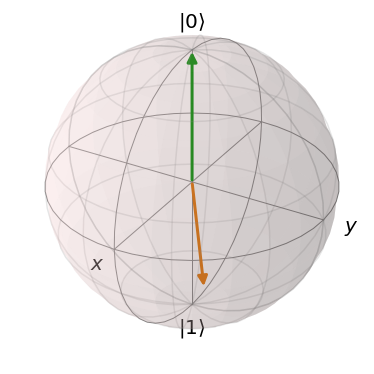

In [6]:
psi0 = psi(1.0, 0.0)
piPulse = pulse(np.pi, 1.0, 0.1, 0.0, 0.0)
psi1 = piPulse@psi0

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.show()

And if you try to bring it back up with the same pulse:

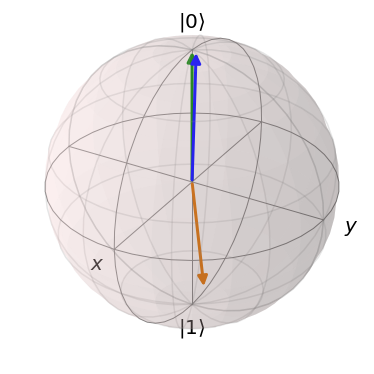

In [7]:
psi2 = piPulse@psi1
b.add_vectors(blochVec(psi2))
b.show()

**Ex 4)** Free evolution of a superposition state with some dark time detuning $\delta = 1.0$. Let the free evolution time be such that $\tau \delta = \pi/2$.

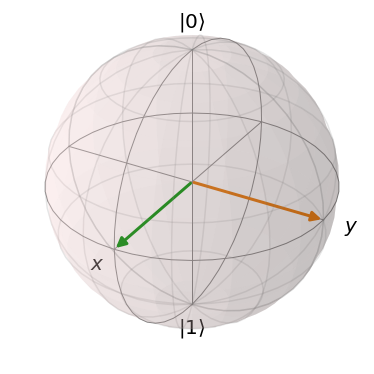

In [8]:
delta = 1.0

psi0 = psi(np.sqrt(2.0)/2.0, np.sqrt(2.0)/2.0)

freeEvo = pulse(np.pi/(2.0*delta), 0.0, delta, 0.0, 0.0) #def pulse(t, Omega0, delta, phi0, phi1):

psi1 = freeEvo@psi0

b = Bloch()
b.add_vectors(blochVec(psi0)) #blue
b.add_vectors(blochVec(psi1)) #blue

b.show()

**Ex 5)** Now a Ramsey sequence with dark time detuning and free evolution time $\tau = \frac{\pi}{\delta}$

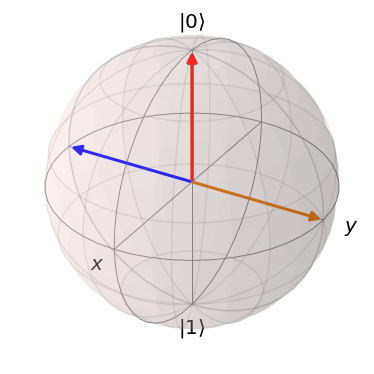

In [9]:
delta = 0.01    #detuning during pulse

pi2Pulse = pulse(np.pi/2.0, 1.0, 0.0, 0.0, 0.0)    #perfect pi/2 pulse
freeEvo = pulse(np.pi/delta, 0.0, delta, 0.0, 0.0) #def pulse(t, Omega0, delta, phi0, phi1):

psi0 = psi(1.0, 0.0)                #start in the ground state
psi1 = pi2Pulse@psi0                #bring to mixed state
psi2 = freeEvo@psi1                 #let phase accumulate
psi3 = pi2Pulse@psi2                #apply another pi/2 pulse

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.add_vectors(blochVec(psi3))     #psi3 = psi0 as expected.
b.show()

**Ex 6)** Now for a phase injection as opposed to dark time detuning (should be same results as last ex).

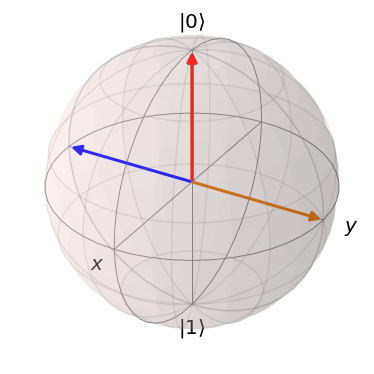

In [10]:
delta = 0.01    #detuning during pulse

pi2Pulse = pulse(np.pi/2.0, 1.0, 0.0, 0.0, 0.0)    #perfect pi/2 pulse
piPhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi) #def pulse(t, Omega0, delta, phi0, phi1):

psi0 = psi(1.0, 0.0)                #start in the ground state
psi1 = pi2Pulse@psi0                #bring to mixed state
psi2 = piPhaseInj@psi1                 #let phase accumulate
psi3 = pi2Pulse@psi2                #apply another pi/2 pulse

b = Bloch()
b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi2))
b.add_vectors(blochVec(psi3))     #psi3 = psi0 as expected.
b.show()

**Ex 7)** Hyper-Ramsey sequence

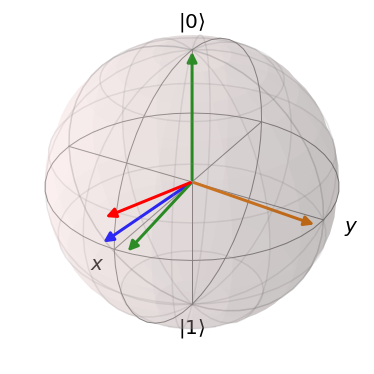

(0.19713509697325543, 9.802960494081914e-05)

In [11]:
delPrime = -0.1      #laser detuning with light shift
Omega0 = 1.0
Omega = np.sqrt(delPrime**2 + Omega0**2)

pi2Pulse = pulse(np.pi/(2.0*Omega), Omega0, delPrime, 0.0, 0.0)
pi32Pulse = pulse(3.0*np.pi/(2.0*Omega), Omega0, delPrime, 0.0, 0.0)
pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 

psi0 = psi(1.0, 0.0)                #start in the ground state
psi1 = pi2Pulse@psi0                #apply a pulse with area pi/2 but with detuning
psi2 = pi2PhaseInj@psi1             #inject a pi/2 phase shift
psi3 = pi2Pulse@psi2                #final state after normal ramsey sequence
psi4 = pi32Pulse@psi2               #final state after hyper ramsey


b = Bloch()
b.add_vectors(blochVec(psi0)) 
b.add_vectors(blochVec(psi1)) 
b.add_vectors(blochVec(psi2)) 
b.add_vectors(blochVec(psi3)) 
b.add_vectors(blochVec(psi4)) 

#b.view = [90,0]
b.show()

blochVec(psi3)[2], blochVec(psi4)[2]   #compare w value for normal ramsey and hyper ramsey pts

Ramsey fringes for pulse detuning but no dark time detuning:

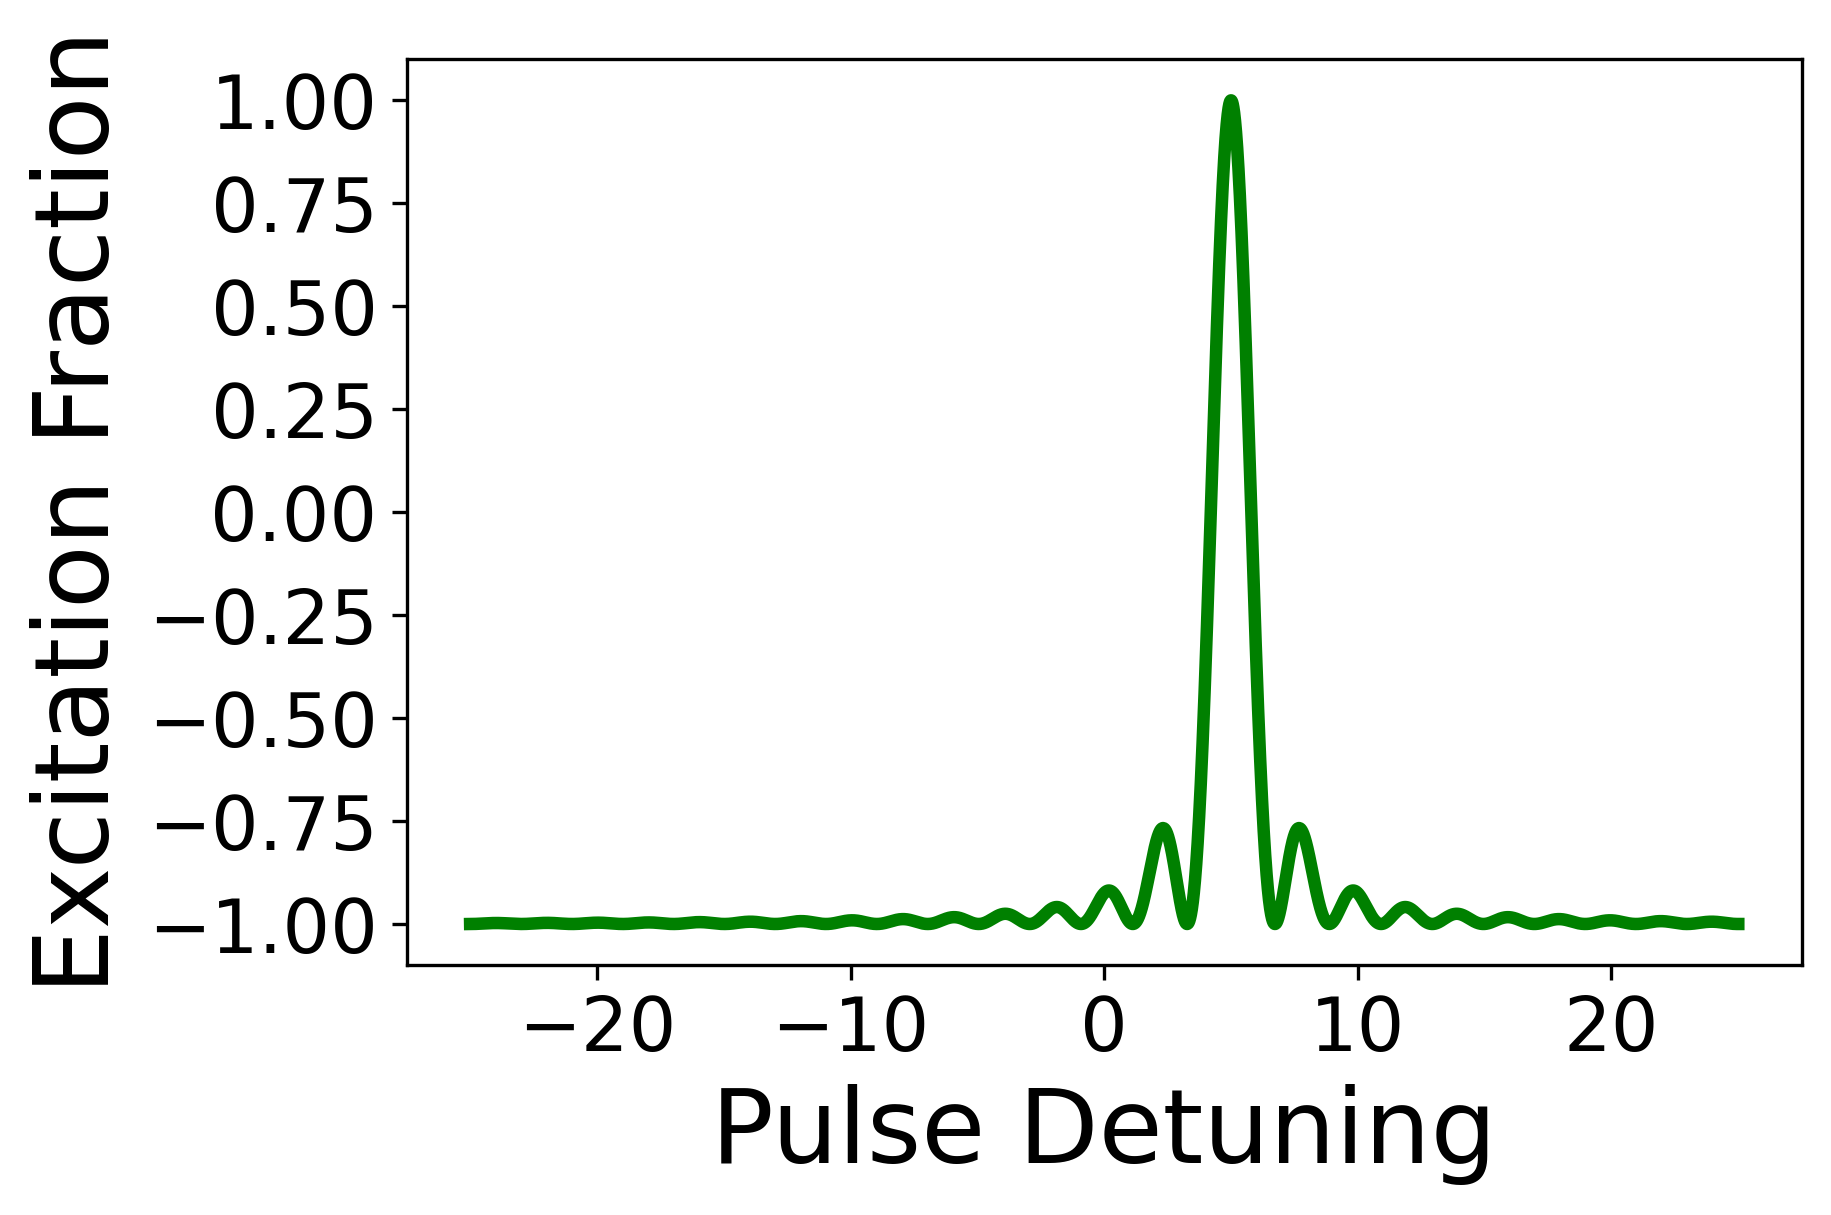

In [16]:
psi0 = psi(0.0, 1.0)
pts = 10000
deltas = np.linspace(-25.0, 25.0, pts)
ws = [0.0]*pts
w2s = [0.0]*pts
shift = 5

for ii in range(pts):
    ws[ii] = blochVec(ramsey(psi0, 1.0, 0.0, deltas[ii]-shift, 1.0))[2]
    w2s[ii] = blochVec(ramsey(psi0, 1.0, 0.0, deltas[ii]+shift, 1.0))[2]

    #def ramsey(psi0, t, delta, delPrime, Omega0):
plt.figure(dpi=300)
plt.plot(deltas, ws,  color="green", linewidth=3)
#plt.plot(deltas, w2s,color="orange", linewidth=3)
plt.xlabel('Pulse Detuning', fontsize="25")
plt.ylabel('Excitation Fraction', fontsize="25")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

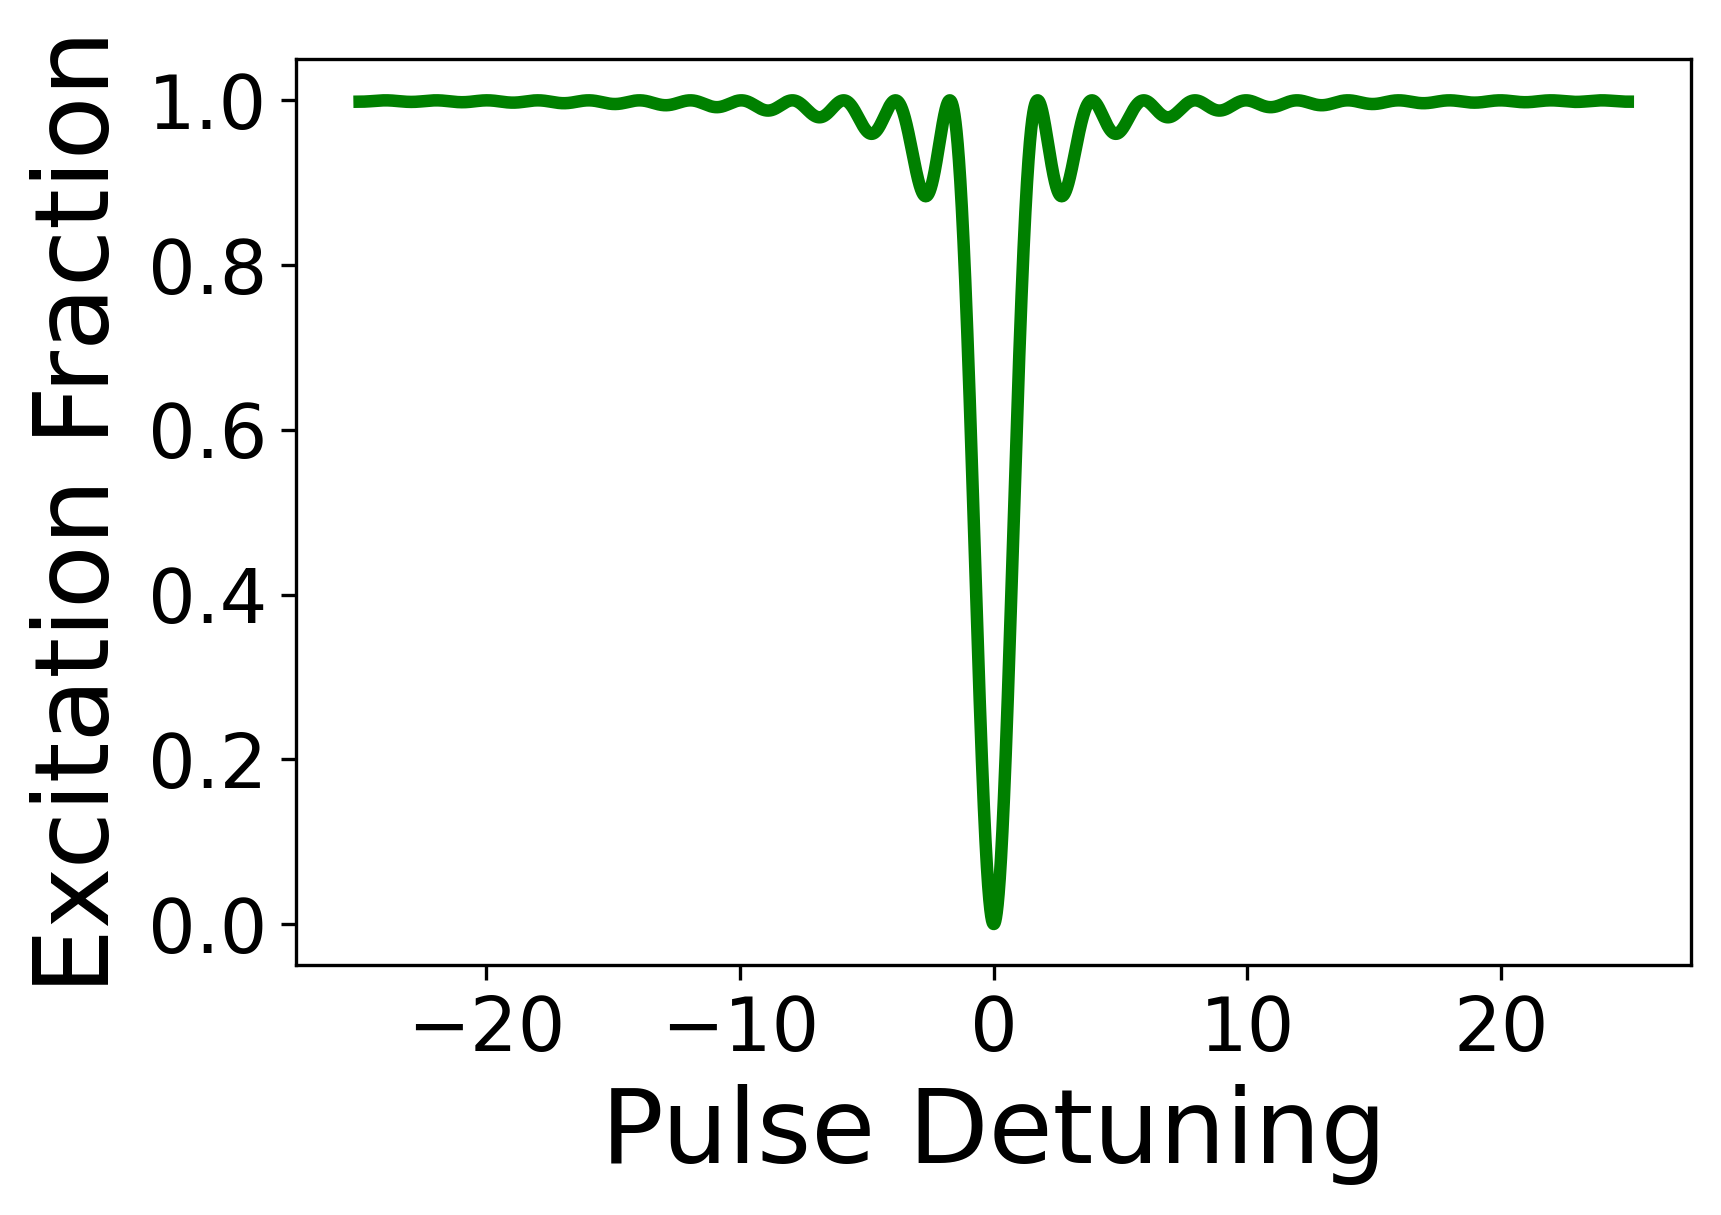

In [29]:
psi0 = psi(0.0, 10.0)
pts = 10000
deltas = np.linspace(-25.0, 25.0, pts)
ws = [0.0]*pts
w2s = [0.0]*pts
shift = 0

for ii in range(pts):
    ws[ii] = rhoee(rabi(psi0, 1.0, deltas[ii]-shift, 1.0))
    #w2s[ii] = blochVec(ramsey(psi0, 1.0, 0.0, deltas[ii]+shift, 1.0))[2]

    #def ramsey(psi0, t, delta, delPrime, Omega0):
plt.figure(dpi=300)
plt.plot(deltas, ws,  color="green", linewidth=3)
#plt.plot(deltas, w2s,color="orange", linewidth=3)
plt.xlabel('Pulse Detuning', fontsize="25")
plt.ylabel('Excitation Fraction', fontsize="25")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Now with a pi/2 phase jump during the dark time:

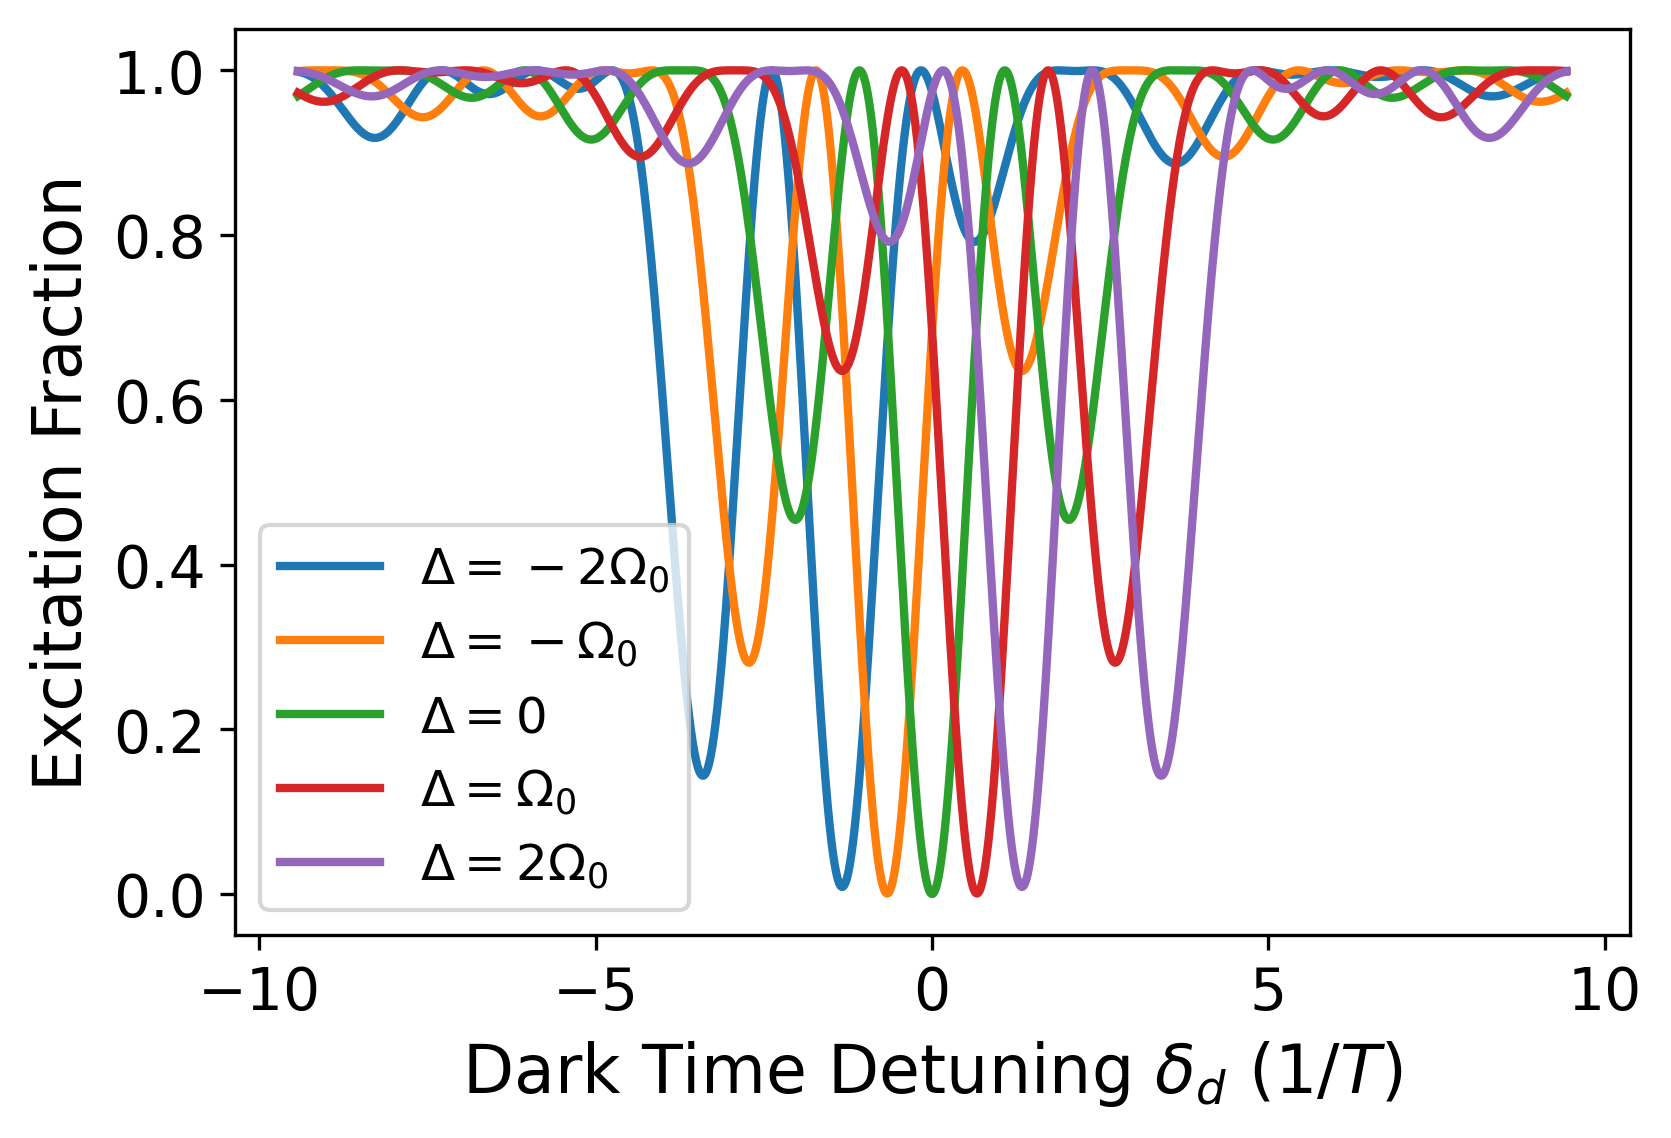

In [23]:
psi0 = psi(0.0, 1.0)
pts = 10000
deltas = np.linspace(-3*np.pi, 3*np.pi, pts)
ws = [0.0]*pts
w2s = [0.0]*pts
w3s = [0.0]*pts
w4s = [0.0]*pts
w5s = [0.0]*pts


delPrime = 1.0

for ii in range(pts):
    #ramseyInj(psi0, t, delta, delPrime, Omega0, phi):
    ws[ii] = rhoee(ramseyInj(psi0, 1.0,  deltas[ii], deltas[ii]-2, 1.0, 0.0))
    w2s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]-1, 1.0, 0.0))
    w3s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]-0.0, 1.0, 0.0))
    w4s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]+1, 1.0, 0.0))
    w5s[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], deltas[ii]+2, 1.0, 0.0))

    
plt.figure(dpi=300)
plt.plot(deltas, w5s, linewidth=2, label=r"$\Delta = -2\Omega_0$")
plt.plot(deltas, w4s, linewidth=2, label=r"$\Delta = -\Omega_0$")
plt.plot(deltas, w3s, linewidth=2, label=r"$\Delta = 0$")
plt.plot(deltas, w2s, linewidth=2, label=r"$\Delta = \Omega_0$")
plt.plot(deltas, ws, linewidth=2, label=r"$\Delta = 2\Omega_0$")





#plt.plot(deltas, w2s, linewidth=2, label=r"$\phi=-\pi/2$")
#plt.plot(-delPrime, 0.0, marker="x", markersize=10)

plt.xlabel(r'Dark Time Detuning $\delta_d \ (1/T)$', fontsize="16")
plt.ylabel('Excitation Fraction', fontsize="16")
plt.xticks(np.arange(-10.0, 10.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

Ramsey fringes for dark time detuning and no pulse detuning:

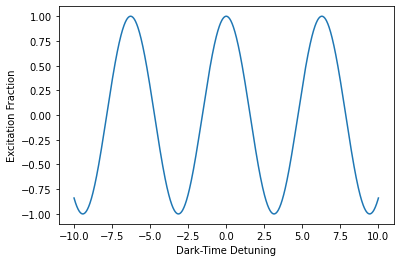

In [14]:
psi0 = psi(0.0, 1.0) #start in excited state
pts = 1000
deltas = np.linspace(-10.0, 10.0, pts)
ws = [0.0]*pts
Rhogg = [0.0]*pts
Rhoee = [0.0]*pts
psi1e = [0.0]*pts
psi1g = [0.0]*pts
psi1 = [0.0]*pts
totProb = [0.0]*pts
for ii in range(pts):
    #def ramsey(psi0, t, delta, delPrime, Omega0):
    #delta = dark time detuning
    #delPrime = pulse detuning
    psi1[ii] = ramsey(psi0, 1.0, deltas[ii], 0.0, 1.0)
    ws[ii] = blochVec(psi1[ii])[2]
    Rhogg[ii] = rhogg(psi1[ii])
    Rhoee[ii] = rhoee(psi1[ii])
    psi1g[ii] = psi1[ii][0]
    psi1e[ii] = psi1[ii][1]
    totProb[ii] = Rhogg[ii] + Rhoee[ii]
    
#plt.plot(deltas, Rhogg)
#plt.plot(deltas, Rhoee)
#plt.plot(deltas, psi1g, label='psi1g')
#plt.plot(deltas, psi1e, label='psi1e')
#plt.plot(deltas, totProb)
plt.plot(deltas, ws)

#plt.plot(deltas, 0.5*np.sin(deltas - np.pi))
plt.xlabel('Dark-Time Detuning')
plt.ylabel('Excitation Fraction')
#plt.legend()
plt.show()

Now with a pi/2 phase jump during the dark time.

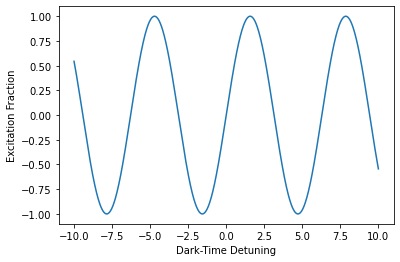

In [15]:
psi0 = psi(0.0, 1.0)
pts = 1000
deltas = np.linspace(-10.0, 10.0, pts)
ws = [0.0]*pts
for ii in range(pts):
    ws[ii] = blochVec(ramseyInj(psi0, 1.0, deltas[ii], 0.0, 1.0))[2]
plt.plot(deltas, ws)
#plt.plot(deltas, np.sin(deltas))
plt.xlabel('Dark-Time Detuning')
plt.ylabel('Excitation Fraction')
plt.show()

Both pulse ($\delta' = 0.5$) and dark time detuning with pi/2 phase jump

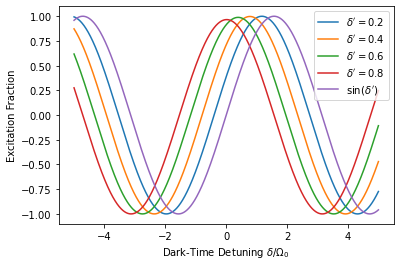

In [16]:
psi0 = psi(0.0, 1.0)
delPrime1 = 0.2
delPrime2 = 0.4
delPrime3 = 0.6
delPrime4 = 0.8
pts = 10000
deltas = np.linspace(-5.0, 5.0, pts)
w1s = [0.0]*pts
w2s = [0.0]*pts
w3s = [0.0]*pts
w4s = [0.0]*pts
ne = [0.0]*pts
for ii in range(pts):
    w1s[ii] = blochVec(ramseyInj(psi0, 1.0, deltas[ii], delPrime1, 1.0))[2]
    w2s[ii] = blochVec(ramseyInj(psi0, 1.0, deltas[ii], delPrime2, 1.0))[2]
    w3s[ii] = blochVec(ramseyInj(psi0, 1.0, deltas[ii], delPrime3, 1.0))[2]
    w4s[ii] = blochVec(ramseyInj(psi0, 1.0, deltas[ii], delPrime4, 1.0))[2]
    #ne[ii] = rhoee(ramseyInj(psi0, 1.0, deltas[ii], delPrime, 1.0))
plt.plot(deltas, w1s, label = "$\delta' = $" + str(delPrime1))
plt.plot(deltas, w2s, label = "$\delta' = $" + str(delPrime2))
plt.plot(deltas, w3s, label = "$\delta' = $" + str(delPrime3))
plt.plot(deltas, w4s, label = "$\delta' = $" + str(delPrime4))
plt.plot(deltas, np.sin(deltas), label = "$\sin(\delta')$")
#plt.plot(deltas, 0.5*np.cos(deltas) + 0.5)
#plt.plot(deltas, ne)
plt.xlabel('Dark-Time Detuning $\delta/\Omega_0$')
plt.ylabel('Excitation Fraction')
plt.legend()
plt.show()

### Recreating Fig 2 in original Hyper Ramsey Paper


In [17]:
def hyperRamsey(psi0, t1, T, t2, Omega0, delta, delPrime):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse2@freeEvo@pulse1@psi0

The conditions in the paper are $\Omega_0 \tau_1 = \pi /2$, $\tau_2/\tau_1 = 3$, and $\Omega_0 T = 20$. Let me set $\Omega_0 = 1$

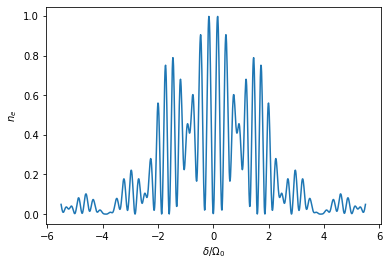

In [18]:
psi0 = psi(1.0, 0.0) #ground state
pts = 1000
deltas = np.linspace(-5.5, 5.5, pts)
ne = [0.0]*pts
for ii in range(pts):
    ne[ii] = rhoee(hyperRamsey(psi0, np.pi/2.0, 20.0, 3.0*np.pi/2.0, 1.0, deltas[ii], deltas[ii]))
plt.plot(deltas, ne)
plt.xlabel('$\delta / \Omega_0$')
plt.ylabel('$n_e$')
plt.show()

In [19]:
def hyperRamseyPhaseJump(psi0, t1, T, t2, Omega0, delta, delPrime):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    #pulse2 = pulse(2.0*t2/3.0, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega0, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega0, delPrime, 0.0, 0.0)
    PiphaseInj = pulse(0.0, 0.0, 0.0, -np.pi/2.0, np.pi/2.0)
    Pi2phaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    #return pulse3@PiphaseInj@pulse2@Pi2phaseInj@freeEvo@pulse1@psi0
    return pulse3@pulse2@freeEvo@pulse1@psi0

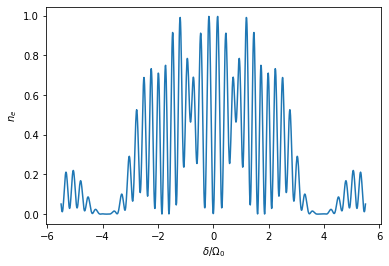

In [20]:
psi0 = psi(1.0, 0.0) #ground state
pts = 1000
deltas = np.linspace(-5.5, 5.5, pts)
ne = [0.0]*pts
for ii in range(pts):
    ne[ii] = rhoee(hyperRamseyPhaseJump(psi0, np.pi/2.0, 20.0, 3.0*np.pi/2.0, 1.0, deltas[ii], deltas[ii]))
plt.plot(deltas, ne)
plt.xlabel('$\delta / \Omega_0$')
plt.ylabel('$n_e$')
plt.show()

Now a sanity check with what should be an identical plot with different implementation.

In [21]:
def hyperRamseyPhaseJump1(psi0, t1, T, t2, Omega0, delta, delPrime):
    #psi0 = original state
    #t1 = pulse 1 duration
    #T = dark time
    #t2 = pulse 2 duration
    #Omega0 = rabi freq
    #delta = dark time detuning
    #delPrime = pulse detuning
    #phi = phase injection
    
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, Omega0, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega0, delPrime, 0.0, 0.0)
    PiphaseInj = pulse(0.0, 0.0, 0.0, 0, np.pi)
    #Pi2phaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@PiphaseInj@pulse2@PiphaseInj@freeEvo@pulse1@psi0

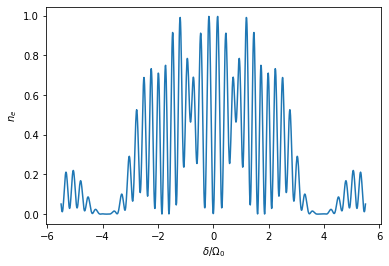

In [22]:
psi0 = psi(1.0, 0.0) #ground state
pts = 1000
deltas = np.linspace(-5.5, 5.5, pts)
ne = [0.0]*pts
for ii in range(pts):
    ne[ii] = rhoee(hyperRamseyPhaseJump1(psi0, np.pi/2.0, 20.0, 3.0*np.pi/2.0, 1.0, deltas[ii], deltas[ii]))
plt.plot(deltas, ne)
plt.xlabel('$\delta / \Omega_0$')
plt.ylabel('$n_e$')
plt.show()

And again.. but now with the $3\pi/2$ pulse sequence before the dark time:

In [26]:
def hyperRamseyPhaseJump2(psi0, t1, T, t2, Omega0, delta, delPrime):
    pulse1 = pulse(t1/3.0, Omega0, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega0, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega0, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pulse2@pulse1@psi0

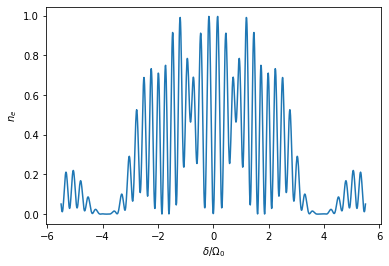

In [27]:
psi0 = psi(1.0, 0.0) #ground state
pts = 1000
deltas = np.linspace(-5.5, 5.5, pts)
ne = [0.0]*pts
for ii in range(pts):
    ne[ii] = rhoee(hyperRamseyPhaseJump2(psi0, 3.0*np.pi/2.0, 20.0, np.pi/2.0, 1.0, deltas[ii], deltas[ii]))
plt.plot(deltas, ne)
plt.xlabel('$\delta / \Omega_0$')
plt.ylabel('$n_e$')
plt.show()

In [59]:
blochVec(ramsey(psi0, 1.0, 0.3, 0.0, 1.0))

array([-2.95520207e-01,  3.61907875e-17, -9.55336489e-01])

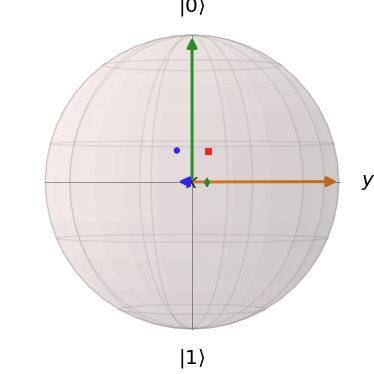

In [35]:
delP = -0.1
psi0 = psi(1.0, 0.0)
pi2Pulse = pulse(np.pi/2.0, 1.0, delP, 0.0, 0.0)
phaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
pi2Pulse3 = pulse(3.0*np.pi/2.0, 1.0, delP, 0.0, 0.0)
#pulse(t, Omega0, delta, phi0, phi1):
psi1 = pi2Pulse@psi0
psi1a = phaseInj@psi1
psi2a = pi2Pulse@psi1a
psi3a = pi2Pulse@psi2a
psi4a = pi2Pulse@psi3a

psi2 = pi2Pulse@psi1
psi3 = pi2Pulse3@psi1


b = Bloch()

b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi1a))
b.add_points(blochVec(psi2a))
b.add_points(blochVec(psi3a))
b.add_points(blochVec(psi4a))


#b.add_vectors(blochVec(psi2))
#b.add_vectors(blochVec(psi3))

b.view = [-90, 0]
#b.add_vectors(blochVec(ramsey(psi0, 1.0, 0.3, 0.0, 1.0)))
b.show()

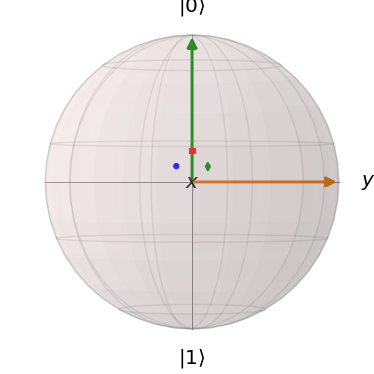

In [37]:
delP = -0.1
psi0 = psi(1.0, 0.0)
pi2Pulse = pulse(np.pi/2.0, 1.0, 0.0, 0.0, 0.0)
pi2PulseDet = pulse(np.pi/2.0, 1.0, delP, 0.0, 0.0)
phaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
pi2Pulse3 = pulse(3.0*np.pi/2.0, 1.0, delP, 0.0, 0.0)
#pulse(t, Omega0, delta, phi0, phi1):
psi1 = pi2Pulse@psi0
psi1a = phaseInj@psi1
psi2a = pi2PulseDet@psi1a
psi3a = pi2PulseDet@psi2a
psi4a = pi2PulseDet@psi3a

psi2 = pi2Pulse@psi1
psi3 = pi2Pulse3@psi1

b = Bloch()

b.add_vectors(blochVec(psi0))
b.add_vectors(blochVec(psi1))
b.add_vectors(blochVec(psi1a))
b.add_points(blochVec(psi2a))
b.add_points(blochVec(psi3a))
b.add_points(blochVec(psi4a))

#b.add_vectors(blochVec(psi2))
#b.add_vectors(blochVec(psi3))

b.view = [-90, 0]
#b.add_vectors(blochVec(ramsey(psi0, 1.0, 0.3, 0.0, 1.0)))
b.show()

In [12]:
rhoee(psi3)

0.00024306334139096624